In [168]:
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/titanic/train.csv
/kaggle/input/titanic/test.csv
/kaggle/input/titanic/gender_submission.csv


# **Data preparation**

In [169]:
trainingData=pd.read_csv("/kaggle/input/titanic/train.csv")
testingData = pd.read_csv("/kaggle/input/titanic/test.csv")
trainingData.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


# **Understanding the data**

In [170]:
print(sum(trainingData.Survived)/len(trainingData.Survived)*100)

38.38383838383838


I want to know the distrubtion of the survived persons from male or female.

% of men who survived: 18.890814558058924
% of women who survived: 74.20382165605095


<AxesSubplot:xlabel='Sex', ylabel='Survived'>

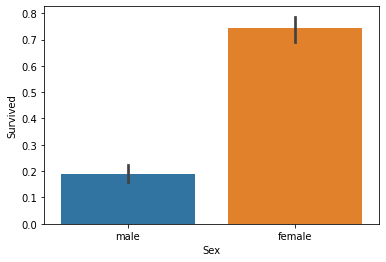

In [171]:
men = trainingData.loc[trainingData.Sex == 'male']["Survived"]
women=trainingData.loc[trainingData.Sex == 'female']["Survived"]
MenPercentageSurvived = sum(men)/len(men)*100
WomenPercentageSurvived=sum(women)/len(women)*100

print("% of men who survived:", MenPercentageSurvived)
print("% of women who survived:", WomenPercentageSurvived)
sns.barplot(x='Sex', y='Survived', data=trainingData)

From the above 2 cells i concluded that women have higher rates of survival than men.

In [172]:
trainingData.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


Here i found that maximum age is highly greater than 75% of the age's data(outliers in the age).

In [173]:
trainingData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


Here from the info i founded that there is null values so i better fill them rather than build data modeling with null values.

The non null count shows that certain columns have missing values

In [174]:
for col in trainingData.columns:
    print(col)

PassengerId
Survived
Pclass
Name
Sex
Age
SibSp
Parch
Ticket
Fare
Cabin
Embarked


Here i checked whether the features or the columns have null data or not

# **PreProcessing:How i detected and handled the missing values**

In [175]:
missingColumns=trainingData.columns[trainingData.isnull().any()]
trainingData.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [176]:
missingColumns

Index(['Age', 'Cabin', 'Embarked'], dtype='object')

Here i get the missing columns that i want to either fill with a statistical function or drop it.

Since the cabin missing values are 687 out of 891 nearly 77% then i will drop the column.

In [177]:
trainingData.drop('Cabin', axis=1,inplace=True)

In [178]:
trainingData['Age'] = trainingData['Age'].fillna(trainingData['Age'].median())

Here i handled the missing values of the age column with the median as from the conclusion i get from section of understanding the data(there is outliers so i'll better choose median over mean).

As the embarked ports are of charachters so introduced an error , i either change their values with numbers so that i can replace the missing values with one of statistical methods.

In [179]:
trainingData['Embarked'].replace('S',0 ,inplace=True)
trainingData['Embarked'].replace('Q',1 ,inplace=True)
trainingData['Embarked'].replace('C',2 ,inplace=True)

In [180]:
trainingData['Embarked'] = trainingData['Embarked'].fillna(trainingData['Embarked'].mean())

Here i found that the mean is the most suitable .

In [181]:
trainingData.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

I make sure that there is no null values in my data.

# **Model Building:I want to get the relationships between my features**

In [182]:
trainingData['Sex'].replace('female',0 ,inplace=True)
trainingData['Sex'].replace('male',1 ,inplace=True)
trainingData.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,0.0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,2.0
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,0.0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,0.0
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,0.0


Now all my data that i will use in the correlation matrix are of form of numbers

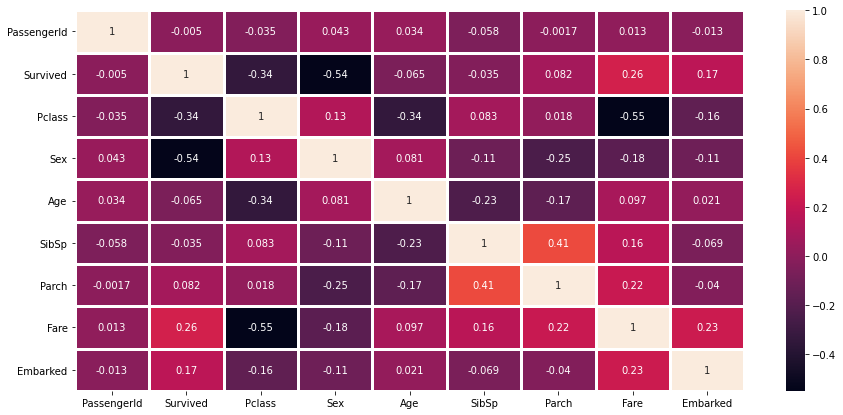

In [183]:
corrMatrix = trainingData.corr()
plt.figure(figsize=(15,7))
sns.heatmap(corrMatrix, linewidths=3,annot=True)
plt.show()

I used  corr matrix to choose best variables important in the survival and to eliminate variables that are poor(low value).From the heatmap i found the row of survival is high with **pclass,sex,fare** so i rather pick this features to predict with in my model.

<AxesSubplot:xlabel='Pclass', ylabel='Survived'>

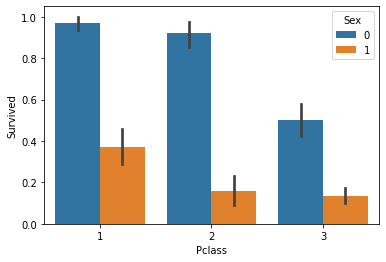

In [184]:
sns.barplot(x='Pclass', y='Survived', data=trainingData, hue='Sex')# 0 here means female and 1 is male

Here women of class 1 is highly survived from women of other classes.

# **Understanding the testing data**

In [185]:
testingData.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [186]:
testingData.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200


In [187]:
testingData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


As there are missing values for the testing data i would rather fill it.

# **Handling the missing values appeared in investgation of testing data.**

In [188]:
testingData['Sex'].replace('female',0 ,inplace=True)
testingData['Sex'].replace('male',1 ,inplace=True)
testingData.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",1,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",0,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",1,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",1,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",0,22.0,1,1,3101298,12.2875,NaN,S


In [189]:
missingTestingColumns=testingData.columns[testingData.isnull().any()]
testingData.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

Same as for training data, i handled the missing values for testing data

In [190]:
testingData['Age'].fillna(testingData['Age'].median(), inplace = True)

In [191]:
missingTestingColumns=testingData.columns[testingData.isnull().any()]
testingData.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [192]:
testingData['Fare'].fillna(testingData['Fare'].median(),inplace=True)

In [193]:
missingTestingColumns=testingData.columns[testingData.isnull().any()]
testingData.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          327
Embarked         0
dtype: int64

In [194]:
testingData.drop('Cabin',axis=1,inplace=True)

In [195]:
missingTestingColumns=testingData.columns[testingData.isnull().any()]
testingData.isnull().sum()

PassengerId    0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [196]:

testingData.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,892,3,"Kelly, Mr. James",1,34.5,0,0,330911,7.8292,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",0,47.0,1,0,363272,7.0000,S
2,894,2,"Myles, Mr. Thomas Francis",1,62.0,0,0,240276,9.6875,Q
3,895,3,"Wirz, Mr. Albert",1,27.0,0,0,315154,8.6625,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",0,22.0,1,1,3101298,12.2875,S


# **Model Evaluation**

In the model evaluaton section i wanted to evaluate which is the best classifier of diffrent models using kfold cross validation (Also to prevent overfitting).

In [197]:

from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB

features = ["Pclass","Sex","Fare"]
X_train =trainingData[features]
Y_train = trainingData['Survived']
X_test = testingData[features]
print("X_train shape: ", X_train.shape)
print("Y_train shape: ", Y_train.shape)
print("X_test shape: ", X_test.shape)

X_train shape:  (891, 3)
Y_train shape:  (891,)
X_test shape:  (418, 3)


In [198]:
X_train.head(10)

,Pclass,Sex,Fare
0,3,1,7.2500
1,1,0,71.2833
2,3,0,7.9250
3,1,0,53.1000
4,3,1,8.0500
5,3,1,8.4583
6,1,1,51.8625
7,3,1,21.0750
8,3,0,11.1333
9,2,0,30.0708


In [199]:
Y_train.head(10)

0    0
1    1
2    1
3    1
4    0
5    0
6    0
7    0
8    1
9    1
Name: Survived, dtype: int64

i get the sample of x,y train

In [200]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
k_fold = KFold(n_splits=10, shuffle=True, random_state=0)

I partition the original dataset by k equal size folds and i choose 10 folds.

I then evaluated using cross validation with 3 diffrent classifcation models to see which has higher mean score.

In [201]:
clf = KNeighborsClassifier(n_neighbors = 13)
scoring = 'accuracy'
score = cross_val_score(clf, X_train, Y_train, cv=k_fold, n_jobs=1, scoring=scoring)
print(score)
round(np.mean(score)*100, 2)

[0.76666667 0.7752809  0.74157303 0.68539326 0.76404494 0.74157303
 0.7752809  0.7752809  0.78651685 0.73033708]


75.42

In [202]:
clf = RandomForestClassifier(n_estimators=13)
scoring = 'accuracy'
score = cross_val_score(clf, X_train, Y_train, cv=k_fold, n_jobs=1, scoring=scoring)
print(score)
round(np.mean(score)*100, 2)

[0.81111111 0.86516854 0.84269663 0.78651685 0.87640449 0.82022472
 0.83146067 0.82022472 0.80898876 0.82022472]


82.83

In [203]:
clf = SVC()
scoring = 'accuracy'
score = cross_val_score(clf, X_train, Y_train, cv=k_fold, n_jobs=1, scoring=scoring)
print(score)
round(np.mean(score)*100, 2)

[0.66666667 0.75280899 0.69662921 0.60674157 0.73033708 0.69662921
 0.66292135 0.68539326 0.59550562 0.62921348]


67.23

From the above 3 cells of diffrent models , i choose the highest one which is random forest.

# **Parameter Tuning**

In [204]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(random_state = 42)
n_estimators = [100, 300, 500, 800, 1200]
max_depth = [5, 8, 15, 25, 30]
min_samples_split = [2, 5, 10, 15, 100]
min_samples_leaf = [1, 2, 5, 10] 

hyperF = dict(n_estimators = n_estimators, max_depth = max_depth,  
              min_samples_split = min_samples_split, 
             min_samples_leaf = min_samples_leaf)

gridF = GridSearchCV(model, hyperF, cv = 3, verbose = 1, n_jobs = -1)
bestF = gridF.fit(X_train, Y_train)

Fitting 3 folds for each of 500 candidates, totalling 1500 fits


In [205]:
bestF.get_params()

{'cv': 3,
 'error_score': nan,
 'estimator__bootstrap': True,
 'estimator__ccp_alpha': 0.0,
 'estimator__class_weight': None,
 'estimator__criterion': 'gini',
 'estimator__max_depth': None,
 'estimator__max_features': 'auto',
 'estimator__max_leaf_nodes': None,
 'estimator__max_samples': None,
 'estimator__min_impurity_decrease': 0.0,
 'estimator__min_impurity_split': None,
 'estimator__min_samples_leaf': 1,
 'estimator__min_samples_split': 2,
 'estimator__min_weight_fraction_leaf': 0.0,
 'estimator__n_estimators': 100,
 'estimator__n_jobs': None,
 'estimator__oob_score': False,
 'estimator__random_state': 42,
 'estimator__verbose': 0,
 'estimator__warm_start': False,
 'estimator': RandomForestClassifier(random_state=42),
 'n_jobs': -1,
 'param_grid': {'n_estimators': [100, 300, 500, 800, 1200],
  'max_depth': [5, 8, 15, 25, 30],
  'min_samples_split': [2, 5, 10, 15, 100],
  'min_samples_leaf': [1, 2, 5, 10]},
 'pre_dispatch': '2*n_jobs',
 'refit': True,
 'return_train_score': False,
 

# **Data prediction**

I get the best paramters for random forest classifier from the gridSearch CV.

In [207]:

model = RandomForestClassifier(criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=-1,
            oob_score=False, random_state=42, verbose=0,
            warm_start=False)
model.fit(X_train, Y_train)
predictions = model.predict(X_test)

output = pd.DataFrame({'PassengerId': testingData.PassengerId, 'Survived': predictions})
output.to_csv('AhmedSubmission.csv', index=False)